In [2]:

#Step 1: Data Loading and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\user\Desktop\JIDE\itsrugby_players.csv")

# Handle missing values
data = data.dropna()

# Convert birthdate to datetime, assuming day/month/year format
data['birthdate'] = pd.to_datetime(data['birthdate'], dayfirst=True)

# Extract year, month, and day from birthdate
data['birth_year'] = data['birthdate'].dt.year
data['birth_month'] = data['birthdate'].dt.month
data['birth_day'] = data['birthdate'].dt.day

# Drop the original birthdate column
data = data.drop(columns=['birthdate'])

# Encode categorical variables
data = pd.get_dummies(data, columns=['pos', 'team', 'competition'])

# Create new features
data['age'] = 2024 - data['birth_year']
data['experience'] = data['year'] - data['birth_year']

# Drop unnecessary columns
data = data.drop(columns=['player_id'])

# Define features and target variable
X = data.drop(columns=['pts'])
y = data['pts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'{name} Results:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('-' * 30)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use 

Logistic Regression Results:
Accuracy: 0.8479277033343721
Precision: 0.8339273357641125
Recall: 0.8479277033343721
F1 Score: 0.8400357089967647
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Results:
Accuracy: 0.9025657006336346
Precision: 0.8900847584969819
Recall: 0.9025657006336346
F1 Score: 0.89491283411203
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Results:
Accuracy: 0.8354627609847305
Precision: 0.8070321888566968
Recall: 0.8354627609847305
F1 Score: 0.8170361611471831
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Results:
Accuracy: 0.9540874623454867
Precision: 0.9548278978174906
Recall: 0.9540874623454867
F1 Score: 0.9537179169971062
------------------------------
MLP Results:
Accuracy: 0.8852186558637166
Precision: 0.8829386508450662
Recall: 0.8852186558637166
F1 Score: 0.883317177972658
------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#The above codes is for Objective 1: Comparing the Accuracy 
#and Applicability of Machine Learning Algorithms in 
#Predicting Player and Team Performance
# Compare the results
# Creating a new target variable for high performance (assuming 'pts' is the performance metric)
# Creating a new target variable for high performance
# Define a threshold for high performance (e.g., median of 'pts')
threshold_value = data['pts'].median()

# Creating a new target variable for high performance
data['high_performance'] = data['pts'].apply(lambda x: 1 if x > threshold_value else 0)

# Define features and target for game strategy optimization
X_strategy = data.drop(columns=['high_performance', 'pts'])  # Drop 'pts' as well since it's used in target
y_strategy = data['high_performance']

# Split the data into training and testing sets
X_train_strategy, X_test_strategy, y_train_strategy, y_test_strategy = train_test_split(X_strategy, y_strategy, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

# Train and evaluate models for strategy optimization
for name, model in models.items():
    model.fit(X_train_strategy, y_train_strategy)
    y_pred_strategy = model.predict(X_test_strategy)

    accuracy = accuracy_score(y_test_strategy, y_pred_strategy)
    precision = precision_score(y_test_strategy, y_pred_strategy, average='weighted')
    recall = recall_score(y_test_strategy, y_pred_strategy, average='weighted')
    f1 = f1_score(y_test_strategy, y_pred_strategy, average='weighted')

    print(f'{name} Strategy Optimization Results:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('-' * 30)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Strategy Optimization Results:
Accuracy: 0.9993767528825179
Precision: 0.9993774749297673
Recall: 0.9993767528825179
F1 Score: 0.9993767234628556
------------------------------
SVM Strategy Optimization Results:
Accuracy: 0.9997922509608393
Precision: 0.9997923312503231
Recall: 0.9997922509608393
F1 Score: 0.999792247710227
------------------------------
Random Forest Strategy Optimization Results:
Accuracy: 0.9992728783629375
Precision: 0.9992733634460063
Recall: 0.9992728783629375
F1 Score: 0.999272849800389
------------------------------
Decision Tree Strategy Optimization Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
------------------------------
MLP Strategy Optimization Results:
Accuracy: 0.9997922509608393
Precision: 0.9997923312503231
Recall: 0.9997922509608393
F1 Score: 0.999792247710227
------------------------------


In [13]:
print(data['year'].unique())


[2022 2021 2020 2019 2017 2018 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2023 2097 2002 2001 2000 1999]


In [15]:
# Filter out the outlier years
data_cleaned = data[(data['year'] <= 2023) & (data['year'] >= 1999)]

# Recalculate the descriptive statistics
descriptive_stats = data_cleaned.describe()
print(descriptive_stats)


               year           pts        played         start           try  \
count  51210.000000  51210.000000  51210.000000  51210.000000  51210.000000   
mean    2017.815661      9.042609      6.948037      4.887600      1.040715   
std        3.415220     23.100720      6.267216      5.328482      1.877386   
min     1999.000000      0.000000      0.000000     -3.000000      0.000000   
25%     2016.000000      0.000000      2.000000      1.000000      0.000000   
50%     2019.000000      0.000000      5.000000      3.000000      0.000000   
75%     2021.000000     10.000000     10.000000      7.000000      1.000000   
max     2023.000000    355.000000     32.000000     31.000000     26.000000   

                pen            dp            tr        yellow           red  \
count  51210.000000  51210.000000  51210.000000  51210.000000  51210.000000   
mean       0.727553      0.015817      0.809041      0.183577      0.014704   
std        4.301944      0.188997      4.089838    

             player_id   birthdate        pos  year   team  \
0  esteban-abadie-4289  01/12/1997  Third Row  2022  Brive   
1  esteban-abadie-4289  01/12/1997  Third Row  2021  Brive   
2  esteban-abadie-4289  01/12/1997  Third Row  2021  Brive   
3  esteban-abadie-4289  01/12/1997  Third Row  2020  Brive   
4  esteban-abadie-4289  01/12/1997  Third Row  2020  Brive   

                    competition   pts  played  start  try  pen   dp   tr  \
0                        Top 14   0.0     2.0    2.0  0.0  0.0  0.0  0.0   
1  European Rugby Challenge Cup   0.0     1.0    0.0  0.0  0.0  0.0  0.0   
2                        Top 14  10.0    20.0   14.0  2.0  0.0  0.0  0.0   
3  European Rugby Challenge Cup   0.0     2.0    2.0  0.0  0.0  0.0  0.0   
4                        Top 14   0.0     8.0    3.0  0.0  0.0  0.0  0.0   

   yellow  red     min  
0     0.0  0.0   160.0  
1     0.0  0.0    29.0  
2     0.0  0.0  1185.0  
3     0.0  0.0   136.0  
4     1.0  0.0   315.0  
               year 

C:\Users\user\AppData\Local\Temp\ipykernel_9200\2448222924.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(0, inplace=True)


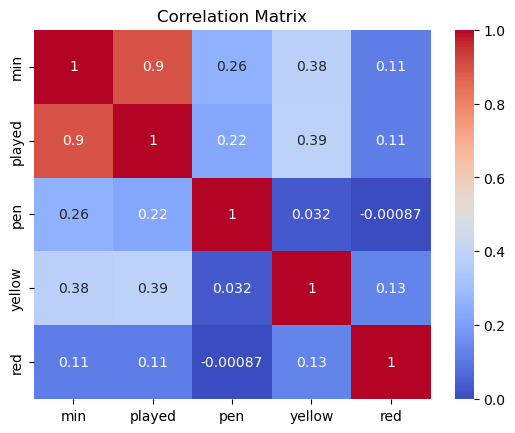

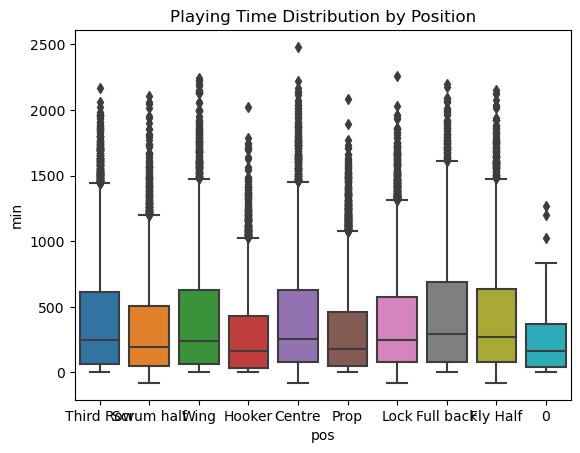

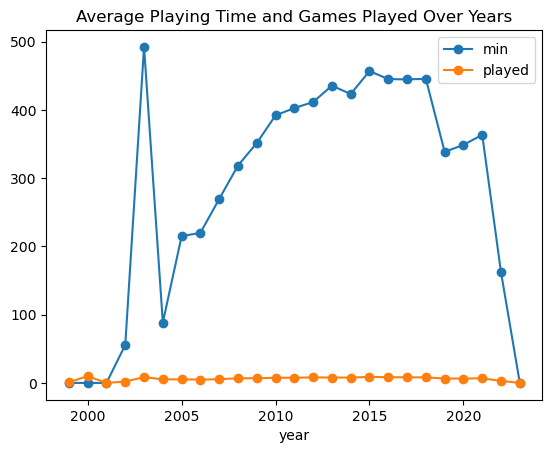

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\user\Desktop\JIDE\itsrugby_players.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Convert 'birthdate' to datetime if needed
data['birthdate'] = pd.to_datetime(data['birthdate'], format='%d/%m/%Y', errors='coerce')

# Replace '0' in non-numeric columns with NaN
data.replace('0', pd.NA, inplace=True)

# Fill missing numeric values with 0 or other appropriate value
data.fillna(0, inplace=True)

# Clean the 'year' column by filtering out invalid years (outliers)
data_cleaned = data[(data['year'] >= 1999) & (data['year'] <= 2023)]

# Recalculate the descriptive statistics after cleaning the data
descriptive_stats = data_cleaned.describe()
print(descriptive_stats)

# Correlation matrix to see relationships between numerical variables
corr = data_cleaned[['min', 'played', 'pen', 'yellow', 'red']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Playing time distribution by position
sns.boxplot(x='pos', y='min', data=data_cleaned)
plt.title('Playing Time Distribution by Position')
plt.show()

# Trends over years (average playing time and games played)
yearly_trends = data_cleaned.groupby('year')[['min', 'played']].mean()
yearly_trends.plot(kind='line', marker='o')
plt.title('Average Playing Time and Games Played Over Years')
plt.show()

# Total penalties by position
sns.barplot(x='pos', y='pen', data=data_cleaned, estimator=sum)
plt.title('Total Penalties by Position')
plt.show()


In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\user\Desktop\JIDE\itsrugby_players.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display basic information about the dataset (such as number of entries, data types, and missing values)
print("\nDataset Information:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Display the columns in the dataset
print("\nColumns in the dataset:")
print(data.columns)


First 5 rows of the dataset:
             player_id   birthdate        pos  year   team  \
0  esteban-abadie-4289  01/12/1997  Third Row  2022  Brive   
1  esteban-abadie-4289  01/12/1997  Third Row  2021  Brive   
2  esteban-abadie-4289  01/12/1997  Third Row  2021  Brive   
3  esteban-abadie-4289  01/12/1997  Third Row  2020  Brive   
4  esteban-abadie-4289  01/12/1997  Third Row  2020  Brive   

                    competition   pts  played  start  try  pen   dp   tr  \
0                        Top 14   0.0     2.0    2.0  0.0  0.0  0.0  0.0   
1  European Rugby Challenge Cup   0.0     1.0    0.0  0.0  0.0  0.0  0.0   
2                        Top 14  10.0    20.0   14.0  2.0  0.0  0.0  0.0   
3  European Rugby Challenge Cup   0.0     2.0    2.0  0.0  0.0  0.0  0.0   
4                        Top 14   0.0     8.0    3.0  0.0  0.0  0.0  0.0   

   yellow  red     min  
0     0.0  0.0   160.0  
1     0.0  0.0    29.0  
2     0.0  0.0  1185.0  
3     0.0  0.0   136.0  
4     1.0  0.0  

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'data' is your DataFrame containing player statistics
data = pd.read_csv(r"C:\Users\user\Desktop\JIDE\itsrugby_players.csv")

# Preprocessing: Encoding categorical features if any
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define the target variable and features
data['high_performance'] = np.where(data['pts'] > 20, 1, 0)  # Assuming 'pts' is the points scored column
X = data.drop(['high_performance', 'pts'], axis=1)  # Dropping the target and points columns from features
y = data['high_performance']

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation to assess model robustness
cross_val_scores = cross_val_score(rf, X, y, cv=10)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of Cross-Validation: {cross_val_scores.std() * 100:.2f}%")

# Feature importance analysis
feature_importances = rf.feature_importances_
important_features = pd.Series(feature_importances, index=data.drop(['high_performance', 'pts'], axis=1).columns).sort_values(ascending=False)

print("Feature Importances:\n", important_features)

# Insights for game strategy optimization
top_features = important_features.head(5)
print("\nTop 5 Features Influencing High Performance:\n", top_features)


Accuracy: 99.64%
Precision: 99.17%
Recall: 97.31%
F1 Score: 98.23%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13767
           1       0.99      0.97      0.98      1597

    accuracy                           1.00     15364
   macro avg       0.99      0.99      0.99     15364
weighted avg       1.00      1.00      1.00     15364

Cross-Validation Accuracy: 99.65%
Standard Deviation of Cross-Validation: 0.10%
Feature Importances:
 try            0.442597
tr             0.200219
pen            0.181188
start          0.040541
min            0.032141
pos            0.028440
played         0.028229
dp             0.009510
player_id      0.008377
team           0.007515
birthdate      0.007429
competition    0.006174
year           0.005765
yellow         0.001599
red            0.000275
dtype: float64

Top 5 Features Influencing High Performance:
 try      0.442597
tr       0.200219
pen      0.181188
star